<a href="https://colab.research.google.com/github/dmunozbe/TFM_DataScience/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering**

In [53]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import scale
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [56]:
# Cargar datos
data = pd.read_csv('/content/drive/MyDrive/UOC/TFM/Datasets definitivos/Final.csv')
data.head()

,Any,Trimestre,Mes,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compraventa_Total,Compraventa_Unitario,ParadosReg,...,Internet,Movil,Index_Turisme,Index_Motos,Index_Ciclomotors,Index_Furgonetes,Index_Camions,Index_Resta,Zona Verde (m²),m² por habitante
0,2014,1,1,1,Ciutat Vella,1,el Raval,142.8,2813.0,4588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,628919.0,6.2
1,2014,1,2,1,Ciutat Vella,1,el Raval,142.8,2813.0,4539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,628919.0,6.2
2,2014,1,3,1,Ciutat Vella,1,el Raval,142.8,2813.0,4572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,628919.0,6.2
3,2014,2,4,1,Ciutat Vella,1,el Raval,195.2,2948.8,4510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,628919.0,6.2
4,2014,2,5,1,Ciutat Vella,1,el Raval,195.2,2948.8,4379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,628919.0,6.2


In [58]:
# Contar las filas sin NaN
filas_sin_na = data.dropna()
cantidad_filas_sin_na = len(filas_sin_na)

In [59]:
cantidad_filas_sin_na

708

In [69]:
data = data.dropna()

In [70]:
# Mostrar NaN por filas
for index, row in data.iterrows():
    nan_columns = row[row.isna()].index.tolist()
    if nan_columns:
        print(f"Fila {row['Any']} contiene NaN en columnas: {', '.join(nan_columns)}")

In [71]:
data.columns

Index(['Any', 'Trimestre', 'Mes', 'Codi_Districte', 'Nom_Districte',
       'Codi_Barri', 'Nom_Barri', 'Compraventa_Total', 'Compraventa_Unitario',
       'ParadosReg', 'NoParados', 'Sin_Estudios', 'Solo_Estudios_Obligatorios',
       'Bachillerato', 'Estudios_Universitarios', 'Estudios_Obligatorios',
       'ConsumIndustria', 'ConsumResidencial', 'ConsumServeis', 'Pm25', 'Pm10',
       'Participacion', 'AñosEspVida', 'Internet', 'Movil', 'Index_Turisme',
       'Index_Motos', 'Index_Ciclomotors', 'Index_Furgonetes', 'Index_Camions',
       'Index_Resta', 'Zona Verde (m²)', 'm² por habitante'],
      dtype='object')

In [72]:
# Manejar los valores faltantes en características numéricas
imputer_numeric = SimpleImputer(strategy='mean')
data_numeric = data[['Compraventa_Total', 'Compraventa_Unitario','ParadosReg','NoParados','Sin_Estudios','Solo_Estudios_Obligatorios','Bachillerato',
                     'Estudios_Universitarios','Estudios_Obligatorios','ConsumIndustria',
                     'ConsumResidencial','ConsumServeis','Pm25','Pm10','Participacion','AñosEspVida','Internet','Movil','Index_Turisme','Index_Motos',
                     'Index_Ciclomotors','Index_Furgonetes','Index_Camions','Index_Resta','Zona Verde (m²)','m² por habitante']]
data_imputed_numeric = pd.DataFrame(imputer_numeric.fit_transform(data_numeric), columns=data_numeric.columns)
data_imputed_numeric.head()

,Compraventa_Total,Compraventa_Unitario,ParadosReg,NoParados,Sin_Estudios,Solo_Estudios_Obligatorios,Bachillerato,Estudios_Universitarios,Estudios_Obligatorios,ConsumIndustria,...,Internet,Movil,Index_Turisme,Index_Motos,Index_Ciclomotors,Index_Furgonetes,Index_Camions,Index_Resta,Zona Verde (m²),m² por habitante
0,236.7,3775.1,3315.0,831.0,1.8,43.9,20.6,32.3,98.2,16927294.0,...,80.4,98.8,122.718571,64.09619,27.518571,18.271905,6.926667,4.759048,629914.0,6.3
1,236.7,3775.1,3330.0,828.0,1.8,43.9,20.6,32.3,98.2,16399421.0,...,80.4,98.8,122.718571,64.09619,27.518571,18.271905,6.926667,4.759048,629914.0,6.3
2,236.7,3775.1,3291.0,820.0,1.8,43.9,20.6,32.3,98.2,18517557.0,...,80.4,98.8,122.718571,64.09619,27.518571,18.271905,6.926667,4.759048,629914.0,6.3
3,208.9,3838.4,3164.0,802.0,1.8,43.9,20.6,32.3,98.2,17246043.0,...,80.4,98.8,122.718571,64.09619,27.518571,18.271905,6.926667,4.759048,629914.0,6.3
4,208.9,3838.4,3037.0,797.0,1.8,43.9,20.6,32.3,98.2,18634709.0,...,80.4,98.8,122.718571,64.09619,27.518571,18.271905,6.926667,4.759048,629914.0,6.3


In [73]:
# Estandarizar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data_imputed_numeric)

In [74]:
# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled)

KMeans(n_clusters=3, random_state=42)

In [75]:
# Obtener las etiquetas de los clusters y agregarlas al DataFrame original
data['Cluster'] = kmeans.labels_

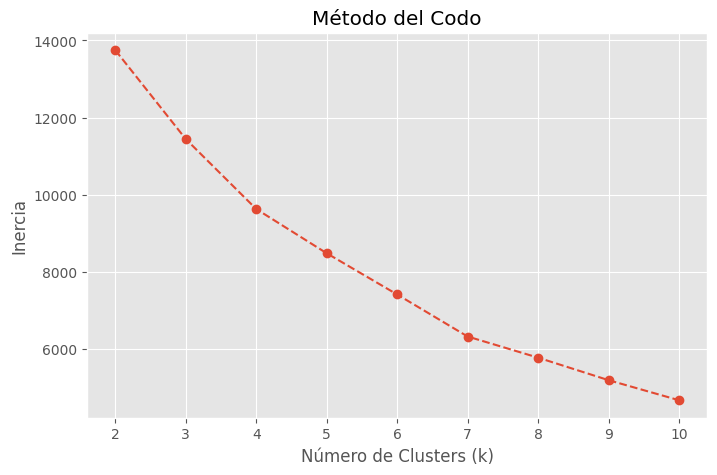

Coeficiente de Silueta: 0.2854992813607934


In [80]:
# 3. Selección del número óptimo de clusters
# Usar método del codo para encontrar el número óptimo de clusters
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

# 4. Aplicación del algoritmo de clustering
# Basándonos en el método del codo, seleccionamos un número de clusters (k=3)
kmeans_final = KMeans(n_clusters=4, random_state=42)
kmeans_final.fit(features_scaled)

# 5. Evaluación de los resultados
# Coeficiente de Silueta
silhouette_avg = silhouette_score(features_scaled, kmeans_final.labels_)
print("Coeficiente de Silueta:", silhouette_avg)



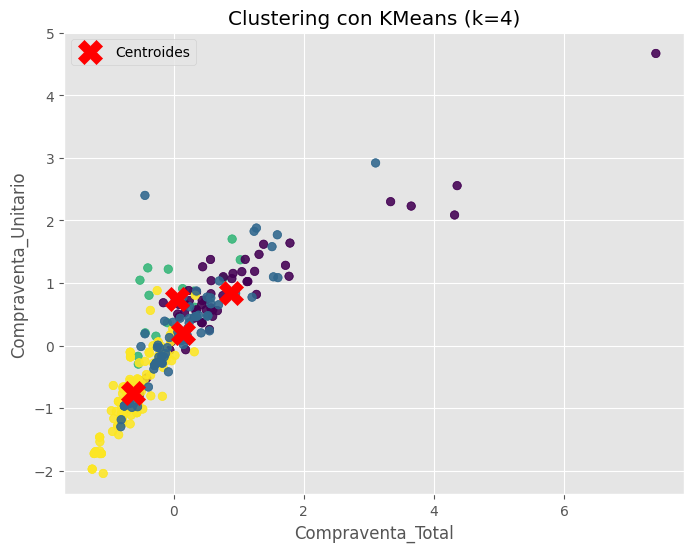

In [81]:
# 6. Visualización de los clusters
# Visualizar los centroides de los clusters en un gráfico de dispersión 2D
plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=kmeans_final.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroides')
plt.xlabel('Compraventa_Total')
plt.ylabel('Compraventa_Unitario')
plt.title('Clustering con KMeans (k=4)')
plt.legend()
plt.show()

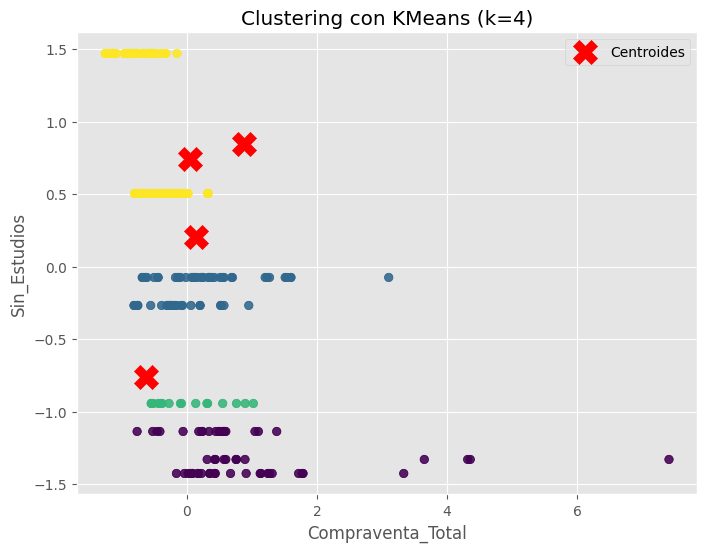

In [82]:
# 6. Visualización de los clusters
# Visualizar los centroides de los clusters en un gráfico de dispersión 2D
plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 4], c=kmeans_final.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroides')
plt.xlabel('Compraventa_Total')
plt.ylabel('Sin_Estudios')
plt.title('Clustering con KMeans (k=4)')
plt.legend()
plt.show()

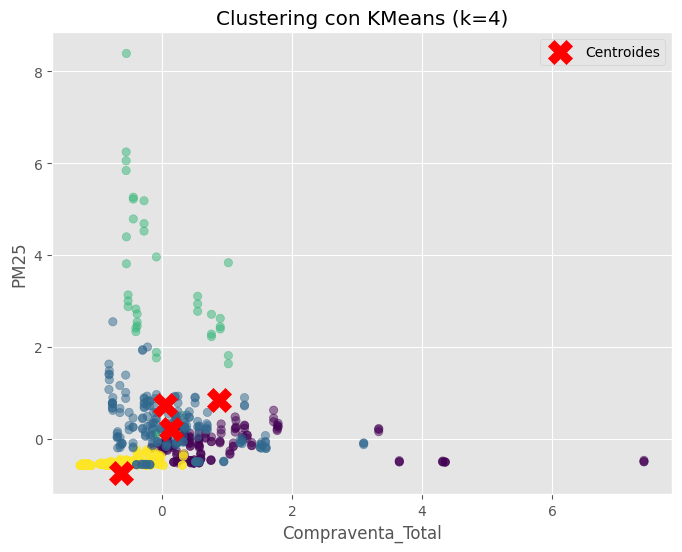

In [83]:
# 6. Visualización de los clusters
# Visualizar los centroides de los clusters en un gráfico de dispersión 2D
plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 9], c=kmeans_final.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroides')
plt.xlabel('Compraventa_Total')
plt.ylabel('PM25')
plt.title('Clustering con KMeans (k=4)')
plt.legend()
plt.show()